## Regression Metrics
In the following you will experiment with evaluation metrics for regression. In particular you will work on the Boston dataset to predict the price for houses with given different features. You have to evaluate the model using Mean Absolute Error (MAE) and Mean squared Error (MSE) and use this to argue for which model is the most appropriate for the given dataset. 

* Run the following cell to read the dataset


In [10]:
# read dataset
#X, Y = datasets.make_regression(n_samples=200, n_features=20, )
import sys
import warnings
import itertools

warnings.filterwarnings("ignore")
import sklearn
from sklearn import metrics, datasets
boston = datasets.load_boston()
X, Y = boston.data, boston.target
print('Dataset Size : ', X.shape, Y.shape)


Dataset Size :  (506, 13) (506,)


You will be splitting a dataset into train/test sets with 80% for a train set and 20% for the test set.


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, random_state=1, )
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


Train/Test Size :  (404, 13) (102, 13) (404,) (102,)


You'll now initialize a simple LinearSVR model and train it on the train dataset. You'll then check its performance by evaluating various regression metrics provided by scikit-learn.


In [12]:
from sklearn.svm import LinearSVR

svr = LinearSVR()
svr.fit(X_train, Y_train)


LinearSVR()

## Mean Absolute Error
Mean absolute error is a simple sum of the absolute difference between actual and predicted target value divided by a number of samples.


$MAE=\frac{1}{n}  \sum_{i=1}^{n}|x_i-y_i|$


In [13]:
from sklearn.metrics import mean_absolute_error
Y_preds = svr.predict(X_test)
print('Test MAE  : %.3f'%mean_absolute_error(Y_test, Y_preds))
print('Train MAE : %.3f'%mean_absolute_error(Y_train, svr.predict(X_train)))


Test MAE  : 5.335
Train MAE : 4.600


## Mean Squared Error
Mean Squared Error loss function sum of the squared difference between actual and predicted value divided by a number of samples.

$MSE=\frac{1}{n}  \sum_{i=1}^{n}(x_i-y_i)^2$


In [14]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

print('Test MSE  : %.3f'%mean_squared_error(Y_test, Y_preds))
print('Train MSE : %.3f'%mean_squared_error(Y_train, svr.predict(X_train)))


Test MSE  : 41.904
Train MSE : 36.101


# Model Selection
In this excercise you will use polynomial fitting in a linear regression model and will try to find the optimal complexity by looking at the error for different models.   


In [15]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


## Dataset
Run the cell below to bulid the dataset and then split it to test and train sets. 


In [16]:
from sklearn.model_selection import train_test_split

#cosin function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1


X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.60, test_size=0.40, random_state=1)
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


Train/Test Size :  (18,) (12,) (18,) (12,)


## Polynomial model 

In the next cell you will bulid a polynomial regression model. The MSE and MAE for test set is claculated and printed. Change the "order" of the polynomial  and observe how the model performance vary.  

degree=5
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(X_train[:, np.newaxis], Y_train)


# Evaluate the models 
scores_mse = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )
scores_mae = cross_val_score(
    pipeline, X[:, np.newaxis], y, scoring="neg_mean_absolute_error", cv=10
)

MSE=-scores_mse.mean()
MAE=-scores_mae.mean()
print("MSE_test",MSE)
print("MAE_test",MAE)


In [17]:
degree=5
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(X_train[:, np.newaxis], Y_train)


# Evaluate the models 
scores_mse = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )
scores_mae = cross_val_score(
    pipeline, X[:, np.newaxis], y, scoring="neg_mean_absolute_error", cv=10
)

MSE=-scores_mse.mean()
MAE=-scores_mae.mean()
print("MSE_test",MSE)
print("MAE_test",MAE)


MSE_test 0.09867570671336284
MAE_test 0.19397246122967268


## Task 3: Model selection
In this task you have to find the order of the polynomial model which has the best performance.

1. calculate Mean Squared Error(MSE) and Mean Absolute Error (MAE) using crossvlidation for orders of the polynomial ranging  from 1 to 9 and plot Error vs Complexity(1-9) based on MSE, MAE


2. find optimal complexity based on each metric. Does the optimal model differ for different metrics? If yes, how you justiy this? 


## Solution:


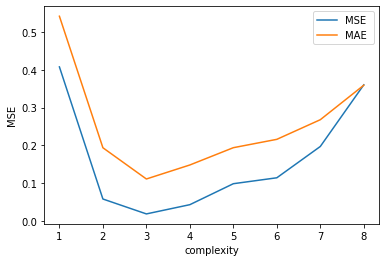

In [18]:
# Copy paste your gaze code here
